📌 1. Формулювання гіпотез
Нульова гіпотеза (H₀):
Розподіл випадків депресії не залежить від кількості спожитої кофеїновмісної кави.

Альтернативна гіпотеза (H₁):
Розподіл випадків депресії залежить від кількості спожитої кофеїновмісної кави.


📌 2. Завантаження бібліотек і введення даних


In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Таблиця з даними
data = np.array([
    [670, 373, 905, 564, 95],  # Так (депресія)
    [11545, 6244, 16329, 11726, 2288]  # Ні (без депресії)
])

# Створюємо DataFrame
columns = ["<=1 cup/week", "2-6 cup/week", "1 cup/day", "2-3 cup/day", ">=4 cup/day"]
rows = ["Depression (Yes)", "Depression (No)"]

df = pd.DataFrame(data, index=rows, columns=columns)
df.loc["Total"] = df.sum(axis=0)  # Додаємо підсумковий рядок
df["Total"] = df.sum(axis=1)  # Додаємо підсумковий стовпець

# Відображення таблиці
df


,<=1 cup/week,2-6 cup/week,1 cup/day,2-3 cup/day,>=4 cup/day,Total
Depression (Yes),670,373,905,564,95,2607
Depression (No),11545,6244,16329,11726,2288,48132
Total,12215,6617,17234,12290,2383,50739


📌 3. Обчислення кількісних характеристик


In [19]:
# Обчислюємо відсоток жінок з депресією у кожній групі
depression_rates = (df.loc["Depression (Yes)"] / df.loc["Total"]) * 100

# Відображаємо
depression_rates.drop("Total")


<=1 cup/week    5.485059
2-6 cup/week    5.636996
1 cup/day       5.251248
2-3 cup/day     4.589097
>=4 cup/day     3.986572
dtype: float64

📌 4. Перевірка гіпотези за допомогою критерію χ² (хи-квадрат)
🔹 Якщо p-value < 0.05, то ми відхиляємо H₀ і вважаємо, що є зв'язок між споживанням кави і депресією.
🔹 Якщо p-value > 0.05, то не можемо відхилити H₀, тобто зв'язку не виявлено.


In [20]:
# Виконуємо тест хі-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

# Вивід результатів
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")

# Виведемо очікувані значення, якщо б депресія була рівномірно розподілена
expected_df = pd.DataFrame(expected, index=rows, columns=columns)
expected_df
# Обчислюємо відсоток жінок із депресією у кожній групі
percent_depressed = (df.loc["Depression (Yes)"] / df.loc["Total"]) * 100

# Додаємо цей рядок у таблицю
df.loc["Depression (%)"] = percent_depressed.round(2)

# Виводимо оновлену таблицю
df



Chi-squared Statistic: 20.9316
Degrees of Freedom: 4
P-value: 0.0003


,<=1 cup/week,2-6 cup/week,1 cup/day,2-3 cup/day,>=4 cup/day,Total
Depression (Yes),670.00,373.00,905.00,564.00,95.00,2607.00
Depression (No),11545.00,6244.00,16329.00,11726.00,2288.00,48132.00
Total,12215.00,6617.00,17234.00,12290.00,2383.00,50739.00
Depression (%),5.49,5.64,5.25,4.59,3.99,5.14


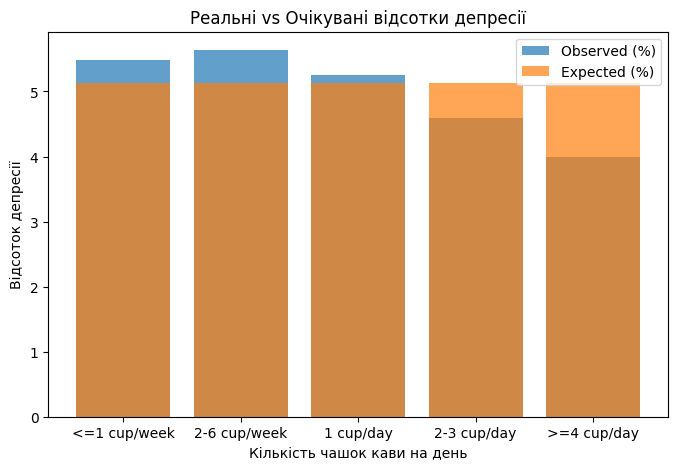

In [21]:
# Обчислюємо відсоток жінок з депресією в кожній групі споживання кави
percent_depressed = (df.loc["Depression (Yes)"] / df.loc["Total"]) * 100

# Відображаємо відсотки (округлено до 2 знаків після коми)
percent_depressed.drop("Total").round(2)

# Обчислимо очікуваний відсоток депресії, якщо б розподіл був рівномірним
expected_percent_depressed = (expected_df.loc["Depression (Yes)"] / df.loc["Total"]) * 100

# Відображаємо очікувані відсотки
expected_percent_depressed.drop("Total").round(2)

import matplotlib.pyplot as plt

# Побудова графіку реальних vs очікуваних відсотків депресії
plt.figure(figsize=(8,5))
plt.bar(columns, percent_depressed.drop("Total"), label="Observed (%)", alpha=0.7)
plt.bar(columns, expected_percent_depressed.drop("Total"), label="Expected (%)", alpha=0.7)
plt.xlabel("Кількість чашок кави на день")
plt.ylabel("Відсоток депресії")
plt.title("Реальні vs Очікувані відсотки депресії")
plt.legend()
plt.show()


📌 5. Висновки
Якщо p-value < 0.05, це свідчить про статистично значущий зв’язок між вживанням кави і рівнем депресії.
Однак, навіть якщо зв’язок є, це не означає, що кава ВПЛИВАЄ на депресію. Це може бути кореляція, а не причинно-наслідковий зв’язок.


📌 6. Чи погоджуємося з твердженням NYTimes?
Так, твердження "занадто рано рекомендувати жінкам вживати додаткову каву" є коректним, тому що:
✅ Кореляція ≠ Причинність → Хоча є зв’язок, це не означає, що кава зменшує ризик депресії.
✅ Можливі інші фактори → Наприклад, жінки, які п'ють більше кави, можуть мати інші звички, які впливають на рівень депресії.
✅ Необхідні додаткові дослідження → Потрібні експериментальні дослідження, а не лише спостереження.

Висновок: Ми можемо знайти статистичний зв'язок, але цього недостатньо для рекомендацій щодо вживання кави. 🚀
